<br>
<br>

#                                     <center> NBA DRAFT ASSISTANT</center>

<br>




## What is the NBA Draft?

The National Basketball Association (NBA) is a professional basketball league of America. Thrity odd teams participate every year coveting the *Larry O'Brien Championship trophy*. Every sporting league obviously has good and bad teams, but the NBA has an amazing recipe to help all the low performing teams come back on top and that is the *the NBA Draft*. 

The NBA draft is an annual event dating back to 1947 in which the teams from the National Basketball Association (NBA) can draft players who are eligible and wish to join the league. These are typically college basketball players, but international players are also eligible to be drafted. 
There are two rounds in the NBA Draft and every team gets one pick in each round. So that is two rounds of thirty picks each.

<br>


## What is the NBA Draft Assistant for ?

Ideally, the team with the worst record in the past season, get the first choice (No.1 Pick) in the NBA draft and the second worst team gets the second pick and so on.

At times the eye test isn't a good enough indicator of how good a particular player can perform in the NBA. It is tough to predict the virtue of a player in a league he hasn't been a part of. 
This is where the *NBA DRAFT ASSISTANT* comes into the picture. It predicts whether or not a player will be successful in the NBA.
In technical terms, it is a classification model that classifies if a player will be successful in the NBA or not based on his performance in college. "Being successful in the NBA" might sound a bit vague, so precisely, this model predicts that a player (if successful) achieves atleast one of the following in his career : 
 - All Star
 - All-NBA Team 
 - Defensive Player of the Year 
 - NBA All-Defensive Team
 - NBA MVP (Most Valuable Player)
 - NBA Sixth Man of the Year
 
 
<br>


<br>

## Data
<br>

### Source of Data
There was no pre-existing data for this purpose, so the dataset was built by scraping three different websites and merging the pulled data.<br>
<a href="https://github.com/akshaygupta16/sportsense/blob/master/ScoutingModelv3.ipynb">Click here to open the notebook created for building the dataset</a>
<br>
<br>



### Understanding the Data

<br>

This dataset contains the overall statistics of the players from their college careers. It contains 17 features for 835 odd players. The last column "NBA Sucess?" will be our target variable.

 *All statistics are college level*
 
 - <font color="green"><b>Pick</b></font> : The number at which the player was picked in the draft
 - <font color="green"><b>Name</b></font> : Player Name
 - <font color="green"><b>Year</b></font> : The Year in which the player was picked by an NBA team
 - <font color="green"><b>Games Played</b></font> : Total Number of games played in college
 - <font color="green"><b>Minutes Per Game</b></font> : Average number of minutes played in a game
 - <font color="green"><b>FGs per game</b></font> : The percentage of Shots made
 - <font color="green"><b>Three point attempts</b></font> : The number of three pointers attempted per game
 - <font color="green"><b>Free Throws per game</b></font> : The percentage of free throws made per game
 - <font color="green"><b>Rebounds per game</b></font> : Number of rebouds collected per game
 - <font color="green"><b>Assists per game</b></font> : Number of assists dished out per game
 - <font color="green"><b>Steals per game</b></font> : Number of steals per game
 - <font color="green"><b>Turnovers per game</b></font> : Average turnovers committed per game
 - <font color="green"><b>Points Per game</b></font> : Average Points Scored by a player per game
 - <font color="green"><b>Position</b></font> : The position represented for the team (Forward/Guard/Center)
 - <font color="green"><b>NBA Success?</b></font> : Whether or not the player was successful in the NBA

In [2]:
#Import the required libraries
import numpy as np

#To plot graphs
from matplotlib import pyplot as plt

#For univariate/bivariate and pairwise relationship visualizations
import seaborn as sns

#To deal with dataframes
import pandas as pd

#To visualize the missingness of data
import missingno as msno

In [3]:
#Importing the data saved upon scraping(into the excel file)
players_data = pd.read_excel('NCAA_to_NBA.xlsx')

<br>
<br>


## Data Types

In [4]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 18 columns):
Unnamed: 0              835 non-null int64
Pick                    835 non-null int64
Name                    835 non-null object
Year                    835 non-null int64
Games Played            835 non-null int64
Minutes Per Game        799 non-null float64
FGs per game            835 non-null float64
Three point attempts    825 non-null float64
Threes per game         764 non-null float64
Free Throws per game    834 non-null float64
Rebounds per game       835 non-null float64
Assists per game        834 non-null float64
Steals per game         832 non-null float64
Blocks per game         832 non-null float64
Turnovers per game      802 non-null float64
Points per game         835 non-null float64
Position                806 non-null object
NBA Success?            834 non-null object
dtypes: float64(11), int64(4), object(3)
memory usage: 117.5+ KB


In [5]:
players_data.head()

,Unnamed: 0,Pick,Name,Year,Games Played,Minutes Per Game,FGs per game,Three point attempts,Threes per game,Free Throws per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Turnovers per game,Points per game,Position,NBA Success?
0,0,1,Karl-Anthony Towns,2015,39,21.1,0.566,0.2,0.250,0.813,6.7,1.1,0.5,2.3,1.4,10.3,Forward,yes
1,1,3,Jahlil Okafor,2015,38,30.1,0.664,0.0,NaN,0.510,8.5,1.3,0.8,1.4,2.5,17.3,Center,no
2,2,6,Willie Cauley-Stein,2015,105,24.5,0.593,0.0,NaN,0.508,6.2,0.9,1.1,2.2,1.2,8.0,Forward,no
3,3,8,Stanley Johnson,2015,38,28.4,0.446,3.1,0.371,0.742,6.5,1.7,1.5,0.4,2.2,13.8,Forward,no
4,4,9,Frank Kaminsky,2015,144,20.4,0.522,1.9,0.369,0.763,4.6,1.3,0.5,1.1,0.8,10.1,Center,no


In [6]:
players_data.tail()

,Unnamed: 0,Pick,Name,Year,Games Played,Minutes Per Game,FGs per game,Three point attempts,Threes per game,Free Throws per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Turnovers per game,Points per game,Position,NBA Success?
830,830,12,Vitaly Potapenko,1996,56,30.5,0.603,0.1,0.167,0.725,6.9,1.4,0.5,1.0,4.2,19.9,Center,no
831,831,15,Steve Nash,1996,113,30.1,0.430,5.8,0.401,0.867,3.1,4.5,1.3,0.1,3.1,14.9,Guard,no
832,832,16,Tony Delk,1996,133,23.7,0.474,5.4,0.397,0.709,3.5,1.6,1.5,0.3,1.5,14.2,Guard,no
833,833,18,John Wallace,1996,127,33.0,0.533,0.8,0.390,0.738,8.4,2.0,1.1,1.6,3.1,16.7,Forward,no
834,834,19,Walter McCarty,1996,103,20.5,0.515,1.8,0.401,0.684,5.1,1.8,0.9,1.0,1.8,9.2,Forward,no


<br>
*Getting rid of the garbage column "Unnamed:0*
<br>

In [7]:
players_data=players_data.drop(['Unnamed: 0'],axis=1)


<br>
<br>

## Converting to appropriate Data types

Based on domain knowledge and observation of data, the following columns need to be converted to 'Category' type.
 - NBA Success?
 - Year
 - Pick
 - Position
 
 <br>
 <br>

In [21]:
players_data['NBA Success?']=players_data['NBA Success?'].astype('category')
players_data['Year']=players_data['Year'].astype('category')
players_data['Pick']=players_data['Pick'].astype('category')
players_data['Position']=players_data['Position'].astype('category')
players_data.dtypes

Pick                    category
Name                      object
Year                    category
Games Played               int64
Minutes Per Game         float64
FGs per game             float64
Three point attempts     float64
Threes per game          float64
Free Throws per game     float64
Rebounds per game        float64
Assists per game         float64
Steals per game          float64
Blocks per game          float64
Turnovers per game       float64
Points per game          float64
Position                category
NBA Success?            category
dtype: object

<br>
<br>

## Nullity of the Data

In [9]:
players_data.isnull().sum()

Pick                     0
Name                     0
Year                     0
Games Played             0
Minutes Per Game        36
FGs per game             0
Three point attempts    10
Threes per game         71
Free Throws per game     1
Rebounds per game        0
Assists per game         1
Steals per game          3
Blocks per game          3
Turnovers per game      33
Points per game          0
Position                29
NBA Success?             1
dtype: int64

<br>
<br>

## Data Description

In [10]:
players_data.describe()

,Games Played,Minutes Per Game,FGs per game,Three point attempts,Threes per game,Free Throws per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Turnovers per game,Points per game
count,835.000000,799.000000,835.000000,825.000000,764.000000,834.000000,835.000000,834.000000,832.000000,832.00000,802.000000,835.000000
mean,89.165269,28.105882,0.485429,2.446909,0.323228,0.707373,5.615928,2.156235,1.099038,0.87524,2.133416,13.156407
std,36.607013,5.398222,0.062184,2.117666,0.135137,0.098628,2.228284,1.531264,0.540378,0.84521,0.717243,4.114893
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00000,0.200000,0.000000
25%,62.000000,25.150000,0.443500,0.400000,0.300000,0.657250,3.900000,1.000000,0.700000,0.30000,1.600000,10.400000
50%,95.000000,29.100000,0.475000,2.200000,0.348000,0.721000,5.400000,1.800000,1.000000,0.60000,2.100000,13.400000
75%,123.000000,32.100000,0.527000,4.100000,0.377250,0.774000,7.050000,2.800000,1.400000,1.20000,2.600000,15.700000
max,152.000000,38.300000,0.694000,10.100000,1.000000,0.931000,12.700000,8.700000,3.200000,5.70000,5.400000,27.500000


<br>
<br>

# Data Visualization

## Distribution of Picks

*Categorial Variable*

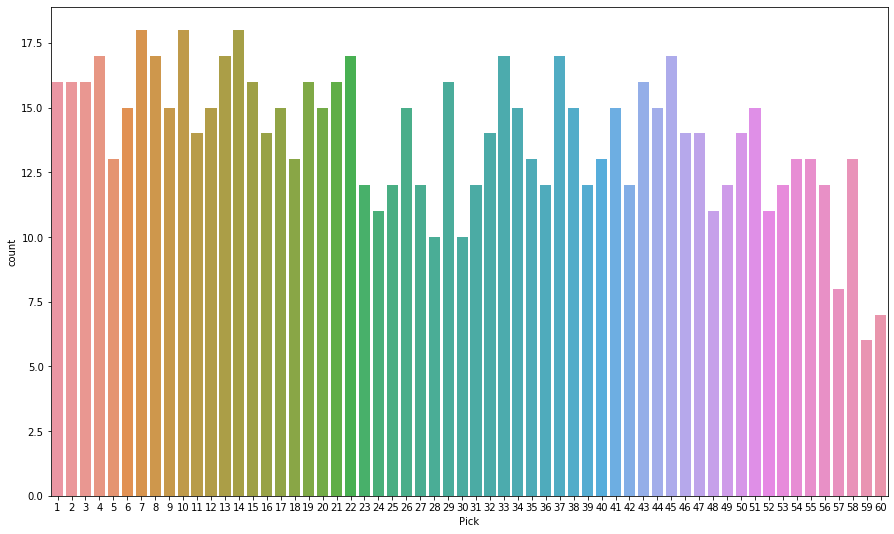

In [11]:
dims = (15,9)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=players_data['Pick'])

<br>
<br>

## What position do more players play ?

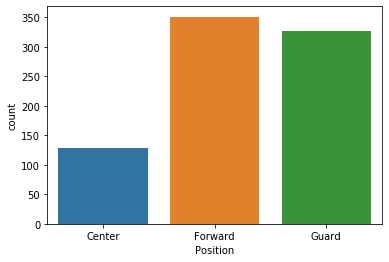

In [22]:
sns.countplot(players_data['Position'])

## What position did the players Successful in the NBA play in college ?

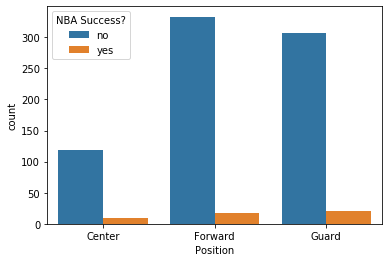

In [23]:
sns.countplot(players_data['Position'],hue=players_data['NBA Success?'])

*It is evident that the position played in college doesnt play a big role in a player's NBA Success. The chances of a player succeding in the NBA for every position in college is almost the same*
<br>
<br>

## What's the range of "Number of games played" 

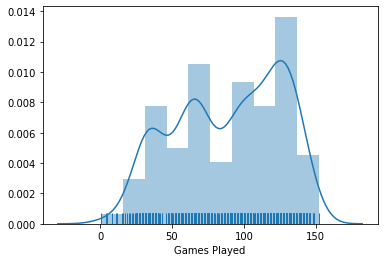

In [12]:
sns.distplot(players_data['Games Played'],rug=True,bins=10)

In [13]:
players_data['Games Played'].describe()

count    835.000000
mean      89.165269
std       36.607013
min        1.000000
25%       62.000000
50%       95.000000
75%      123.000000
max      152.000000
Name: Games Played, dtype: float64

Players with less games -> bad for the data. 
one season -> 38games, some are one and done
Mean at 89, std at 86, so we dont have many outliers. And Logistic regression anyway is insensitive to outliers, so we're going to let it 

<br>
<br>


# How does the distribution of players' stats look like?

<br>

*Contiuous Variables*

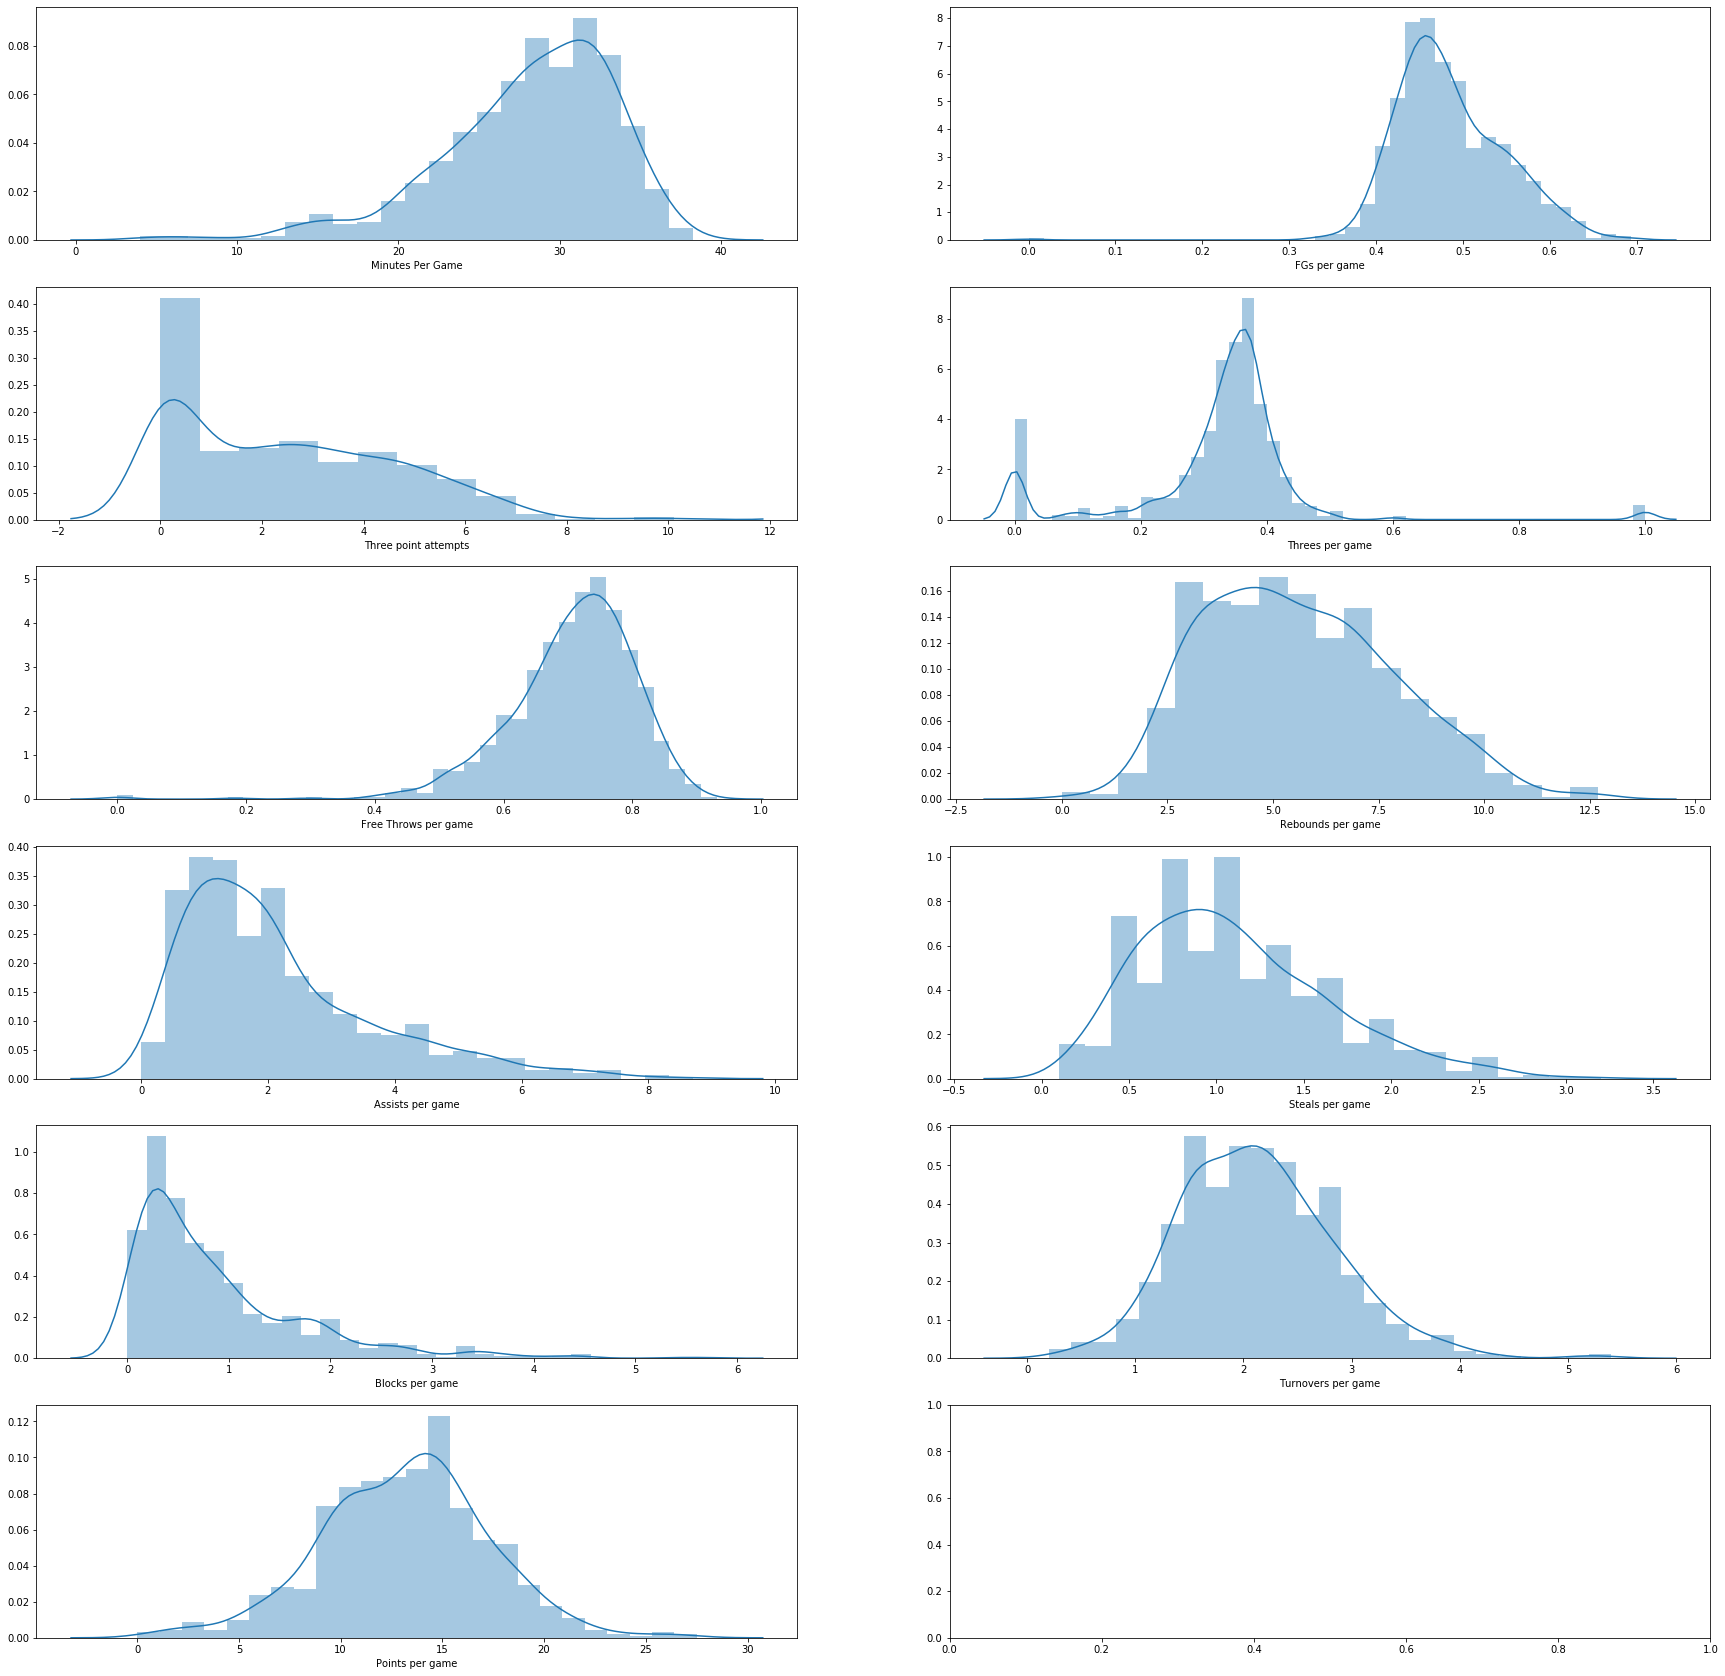

In [24]:

fig,axes = plt.subplots(nrows=6,ncols=2,sharex=False,figsize=(30,30))
sns.distplot(players_data['Minutes Per Game'].dropna(),ax=axes[0,0])
sns.distplot(players_data['FGs per game'].dropna(),ax=axes[0,1])
sns.distplot(players_data['Three point attempts'].dropna(),ax=axes[1,0])
sns.distplot(players_data['Threes per game'].dropna(),ax=axes[1,1])
sns.distplot(players_data['Free Throws per game'].dropna(),ax=axes[2,0])
sns.distplot(players_data['Rebounds per game'].dropna(),ax=axes[2,1])
sns.distplot(players_data['Assists per game'].dropna(),ax=axes[3,0])
sns.distplot(players_data['Steals per game'].dropna(),ax=axes[3,1])
sns.distplot(players_data['Blocks per game'].dropna(),ax=axes[4,0])
sns.distplot(players_data['Turnovers per game'].dropna(),ax=axes[4,1])
sns.distplot(players_data['Points per game'].dropna(),ax=axes[5,0])

<br>
<br>

# Data Preprocessing

## Checking the Missingness of the data

*Is the data missing at random or is the missingness of any two more data related ? Lets find out!*

C:\Users\Akshay\Anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "
C:\Users\Akshay\Anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "
C:\Users\Akshay\Anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


Text(0.5, 1.0, 'Missingness with respect to the Position')

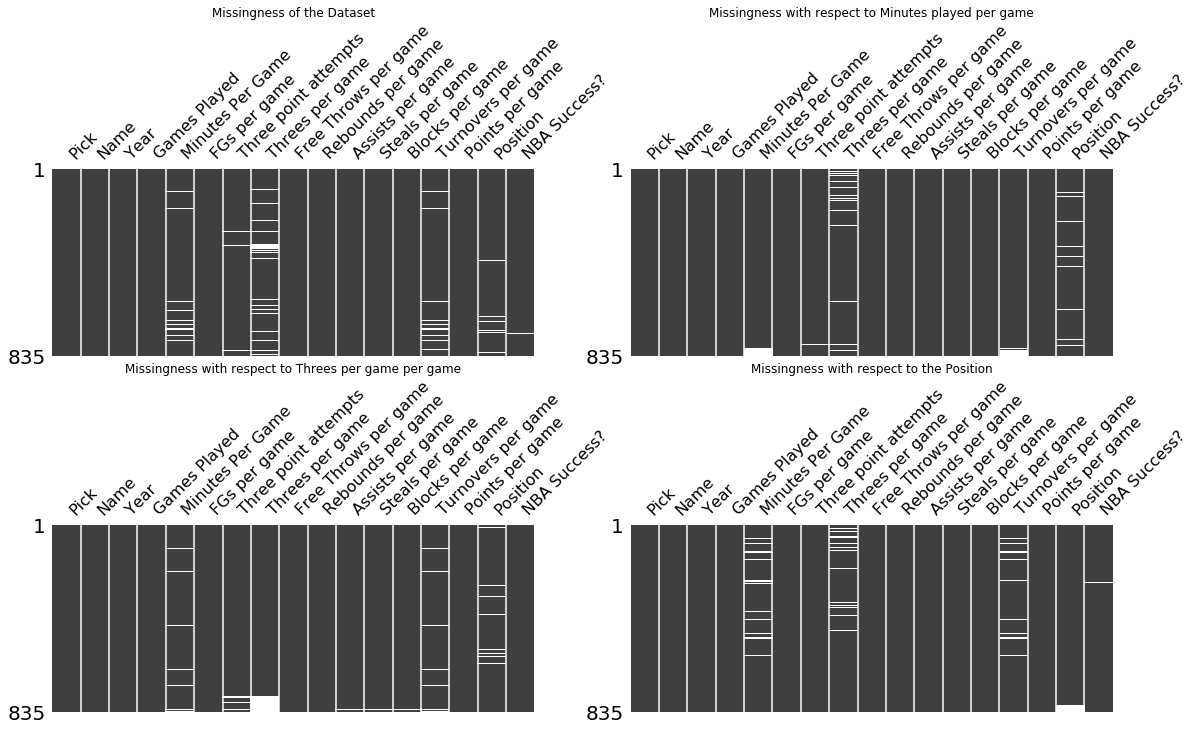

In [25]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(19,10))
plt.subplots_adjust(hspace=0.9)

msno.matrix(players_data,ax=axes[0,0])
msno.matrix(players_data.sort_values('Minutes Per Game'),ax=axes[0,1])
msno.matrix(players_data.sort_values('Threes per game'),ax=axes[1,0])
msno.matrix(players_data.sort_values('Position'),ax=axes[1,1])

axes[0,0].set_title("Missingness of the Dataset")
axes[0,1].set_title("Missingness with respect to Minutes played per game")
axes[1,0].set_title("Missingness with respect to Threes per game per game")
axes[1,1].set_title("Missingness with respect to the Position")

## What do we understand from the above heatmap?

 - In graph number 2 : "Missingness with respect to Minutes played per game", it can be seen that nullity of *Minutes Per Game* is connected to the missingness of "Turnovers Per game". Although it is obvious both are directly proportional but it is senseless to consider this as a pattern
 <br>
 - In graph number 3 : "Missingness with respect to Threes per game", it can be seen that *Three point attempts is missing* is missing where *Threes per game* is missing too, which is very obvious, but we do have some records where we have the number of three attempts but not the threes made
 
 **Usually in basketball, stats are correlated to each other is some degree. So KNN imputation is the best to deal with these missing values.**
 
 <br>
 <br>


In [18]:
from fancyimpute import KNN

knn_imputer = KNN()
players_data_knn = players_data.copy(deep=True)
players_data_knn.iloc[:,[4,6,7,8,10,11,12,13]]= knn_imputer.fit_transform(players_data_knn.iloc[:,[4,6,7,8,10,11,12,13]])

Using TensorFlow backend.


Imputing row 1/835 with 0 missing, elapsed time: 0.240
Imputing row 101/835 with 0 missing, elapsed time: 0.244
Imputing row 201/835 with 0 missing, elapsed time: 0.244
Imputing row 301/835 with 1 missing, elapsed time: 0.244
Imputing row 401/835 with 0 missing, elapsed time: 0.248
Imputing row 501/835 with 0 missing, elapsed time: 0.248
Imputing row 601/835 with 0 missing, elapsed time: 0.248
Imputing row 701/835 with 0 missing, elapsed time: 0.252
Imputing row 801/835 with 0 missing, elapsed time: 0.252


In [19]:
players_data_knn.isnull().sum()
# players_data.isnull().sum()

Pick                     0
Name                     0
Year                     0
Games Played             0
Minutes Per Game         0
FGs per game             0
Three point attempts     0
Threes per game          0
Free Throws per game     0
Rebounds per game        0
Assists per game         0
Steals per game          0
Blocks per game          0
Turnovers per game       0
Points per game          0
Position                29
NBA Success?             1
dtype: int64

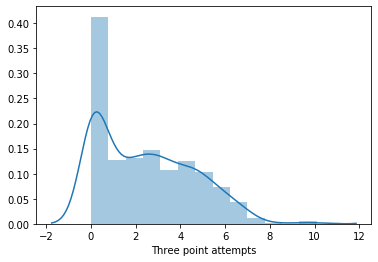

In [27]:
sns.distplot(players_data_knn['Three point attempts'])